### Step 1: Load and Preprocess the Dataset

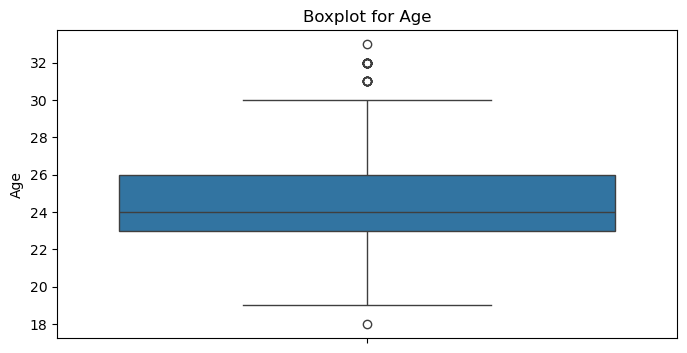

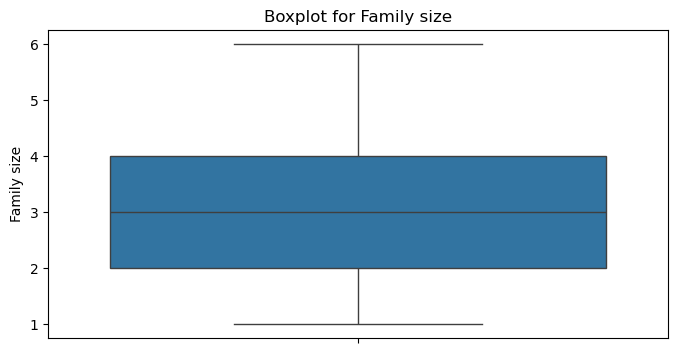

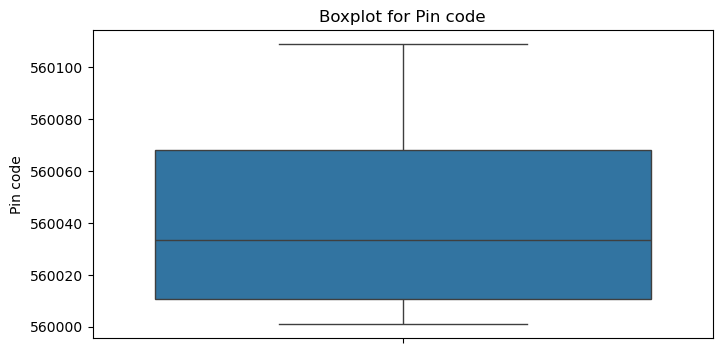

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel('/Users/shounak/Documents/Cuvette/NEW_Proj/onlinefoods.xlsx')

# Step 1: Load and Preprocess the Dataset

# Handle Missing Values
# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# For numerical columns, fill missing values with the mean
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Encode Categorical Variables
# Use one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True).astype(int)

# Check for outliers using boxplot for each numerical column
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(df_encoded[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    
# Define a function to detect outliers using Z-score
def detect_outliers(df, numerical_cols):
    from scipy import stats
    z_scores = np.abs(stats.zscore(df[num_cols]))
    return (z_scores > 3).all(axis=1)

# Remove outliers from the dataset
outliers = detect_outliers(df_encoded, num_cols)
df_clean = df_encoded[~outliers]


### Step 2: Split Data into Training and Testing Sets

In [2]:
# Define features and target variable
X = df_clean.drop('Feedback_Positive', axis=1)  # Features (excluding target)
y = df_clean['Feedback_Positive']  # Target variable (assuming 'Feedback_Positive' is the target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(271, 9) (117, 9) (271,) (117,)


### Step 3: Train and Evaluate Models

In [3]:
# Initialize models
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),  # Scale the data
        ('classifier', LogisticRegression(max_iter=1000))  # Increase the number of iterations
    ]),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: \n{value}\n")

Model: Logistic Regression
Accuracy: 
0.8205128205128205

Precision: 
0.8347826086956521

Recall: 
0.9795918367346939

F1 Score: 
0.9014084507042254

Confusion Matrix: 
[[ 0 19]
 [ 2 96]]

Model: Linear Discriminant Analysis
Accuracy: 
0.8205128205128205

Precision: 
0.8347826086956521

Recall: 
0.9795918367346939

F1 Score: 
0.9014084507042254

Confusion Matrix: 
[[ 0 19]
 [ 2 96]]

Model: K-Nearest Neighbors
Accuracy: 
0.7948717948717948

Precision: 
0.8425925925925926

Recall: 
0.9285714285714286

F1 Score: 
0.883495145631068

Confusion Matrix: 
[[ 2 17]
 [ 7 91]]

Model: Decision Tree Classifier
Accuracy: 
0.7863247863247863

Precision: 
0.8842105263157894

Recall: 
0.8571428571428571

F1 Score: 
0.8704663212435233

Confusion Matrix: 
[[ 8 11]
 [14 84]]

